<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

In [ ]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [ ]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [ ]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

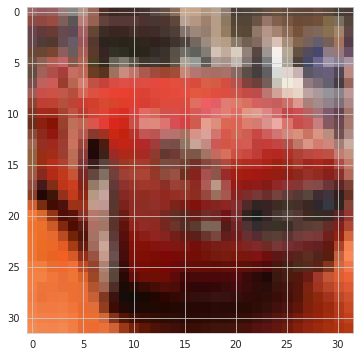

In [ ]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [ ]:
y_train[5]

array([1], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [ ]:
# pd.Series(y_train.flatten()).value_counts()

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
classes[y_train[0][0]]

'frog'

In [ ]:
classes[int(y_train[0])]

'frog'

In [ ]:
#int(np.random.randint(low=0, high=50000, size=1))

In [ ]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

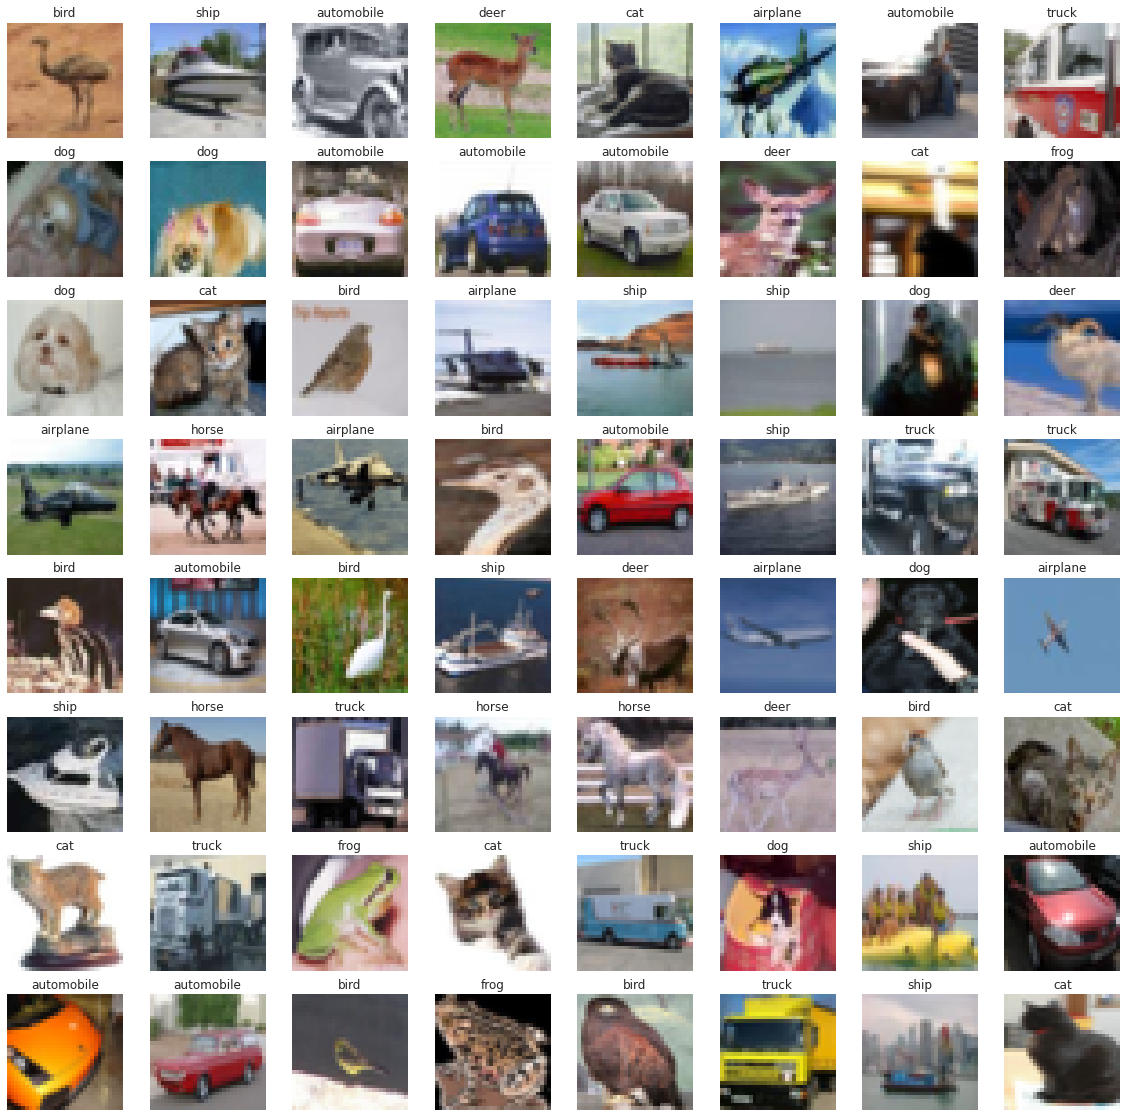

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

In [ ]:
X_train[5].min()

0

In [ ]:
X_train[5].max()

252

In [ ]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
X_train[5].min()

0.0

In [ ]:
X_train[5].max()

0.9882353

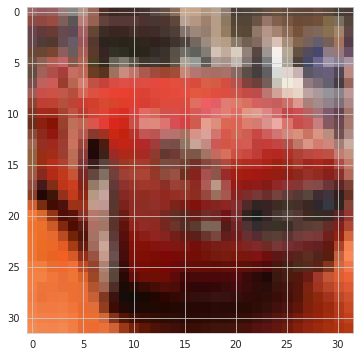

In [ ]:
plt.imshow(X_train[5])

In [ ]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               3

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 19s 5ms/step - loss: 1.4057 - accuracy: 0.4948 - val_loss: 1.0889 - val_accuracy: 0.6145
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0298 - accuracy: 0.6357 - val_loss: 1.0079 - val_accuracy: 0.6445
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8917 - accuracy: 0.6871 - val_loss: 0.9255 - val_accuracy: 0.6819
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7933 - accuracy: 0.7200 - val_loss: 0.8888 - val_accuracy: 0.6910
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7068 - accuracy: 0.7502 - val_loss: 0.8671 - val_accuracy: 0.7051
Epoch 6/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6313 - accuracy: 0.7771 - val_loss: 0.8971 - val_accuracy: 0.7010
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5580 - accuracy: 0.8020 - val_loss: 0.9344 - val_accuracy

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,1.406,0.495,1.089,0.614
1,1.030,0.636,1.008,0.645
2,0.892,0.687,0.925,0.682
3,0.793,0.720,0.889,0.691
4,0.707,0.750,0.867,0.705
5,0.631,0.777,0.897,0.701
6,0.558,0.802,0.934,0.698


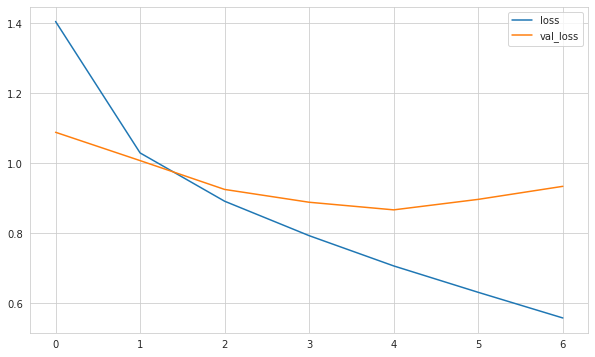

In [ ]:
summary[["loss", "val_loss"]].plot();

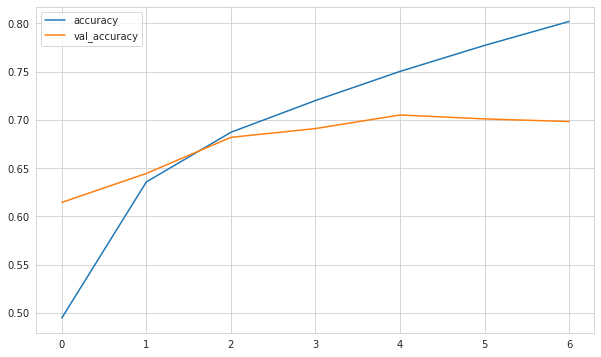

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8671 - accuracy: 0.7051


[0.8671047687530518, 0.7050999999046326]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8671047687530518
Test accuracy: 0.7050999999046326


In [ ]:
pred_prob = model.predict(X_test)
pred_prob

array([[1.0782761e-02, 1.8364984e-03, 3.1927377e-03, ..., 2.4681864e-02,
        5.5751312e-01, 5.6134206e-03],
       [2.9181952e-03, 1.6822220e-01, 6.5936620e-05, ..., 1.1928062e-06,
        8.2804710e-01, 6.3608715e-04],
       [2.8897524e-01, 3.9447207e-02, 2.0105099e-02, ..., 2.1597395e-02,
        5.3968614e-01, 6.2639914e-02],
       ...,
       [5.1677652e-04, 3.4386806e-06, 3.4221020e-02, ..., 2.7473260e-02,
        3.7414608e-05, 1.0858149e-05],
       [3.5724682e-03, 9.8751301e-01, 7.9027971e-04, ..., 6.0345710e-04,
        1.7543492e-03, 7.7723031e-04],
       [2.8558605e-05, 2.3848184e-05, 3.3208021e-04, ..., 9.8515970e-01,
        1.5830117e-05, 1.1524653e-05]], dtype=float32)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([8, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.82      0.79      0.80      1000
           2       0.63      0.57      0.60      1000
           3       0.52      0.54      0.53      1000
           4       0.68      0.62      0.65      1000
           5       0.61      0.60      0.60      1000
           6       0.76      0.80      0.78      1000
           7       0.74      0.79      0.77      1000
           8       0.76      0.86      0.81      1000
           9       0.83      0.73      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[772  13  57  21  10   5  14   9  80  19]
 [ 34 788   9  16   0  10  10   6  46  81]
 [ 74   7 566  73  93  64  59  39  20   5]
 [ 33   7  58 537  64 176  59  33  20  13]
 [ 29   4  71  63 619  42  60  95  14   3]
 [ 21   2  55 181  43 602  17  57  15   7]
 [  5   5  37  77  26  29 798   6  11   6]
 [ 17   2  26  33  54  54   9 787   7  11]
 [ 69  25   8  16   4   4   7   3 856   8]
 [ 50 109   7  13   2   8  11  22  52 726]]


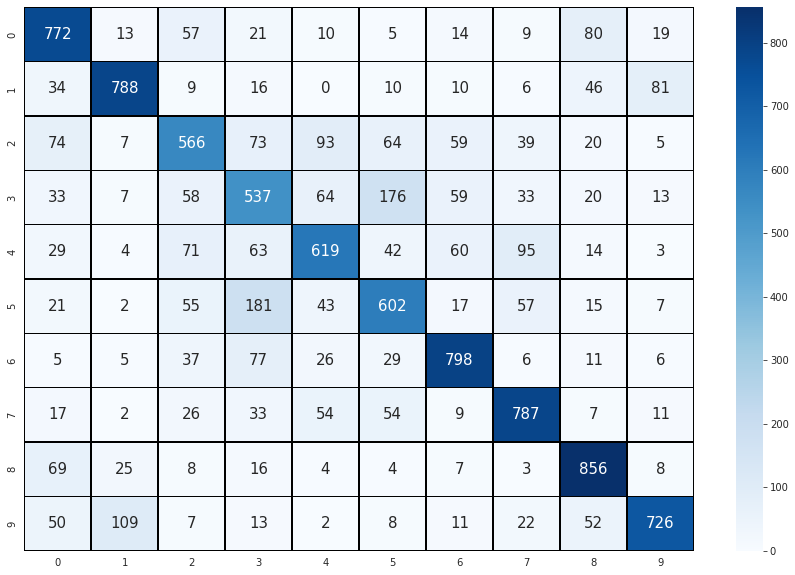

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

# Modelling-2

In [ ]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4334 - accuracy: 0.4789 - val_loss: 1.0825 - val_accuracy: 0.6157
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0158 - accuracy: 0.6389 - val_loss: 0.9233 - val_accuracy: 0.6737
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8814 - accuracy: 0.6864 - val_loss: 0.8107 - val_accuracy: 0.7189
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8002 - accuracy: 0.7181 - val_loss: 0.8156 - val_accuracy: 0.7184
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7478 - accuracy: 0.7363 - val_loss: 0.7665 - val_accuracy: 0.7352
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6958 - accuracy: 0.7547 - val_loss: 0.7016 - val_accuracy: 0.7589
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6672 - accuracy: 0.7649 - val_loss: 0.7276 - val_acc

In [ ]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.433,0.479,1.083,0.616
1,1.016,0.639,0.923,0.674
2,0.881,0.686,0.811,0.719
3,0.800,0.718,0.816,0.718
4,0.748,0.736,0.767,0.735
5,0.696,0.755,0.702,0.759
6,0.667,0.765,0.728,0.752
7,0.625,0.780,0.734,0.745


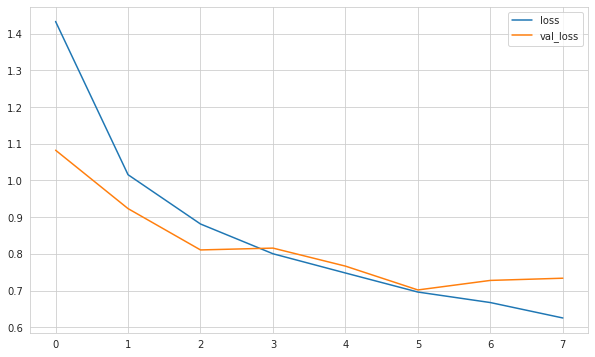

In [ ]:
summary[["loss", "val_loss"]].plot();

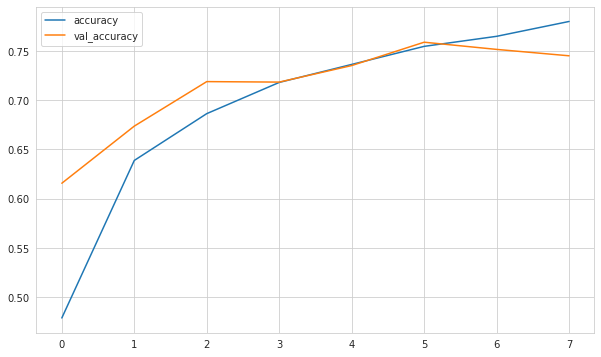

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7016 - accuracy: 0.7589


[0.7015795707702637, 0.758899986743927]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7015795707702637
Test accuracy: 0.758899986743927


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 4, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.89      0.85      0.87      1000
           2       0.70      0.60      0.65      1000
           3       0.54      0.64      0.58      1000
           4       0.69      0.74      0.71      1000
           5       0.69      0.60      0.64      1000
           6       0.79      0.85      0.82      1000
           7       0.81      0.80      0.81      1000
           8       0.87      0.86      0.87      1000
           9       0.83      0.84      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



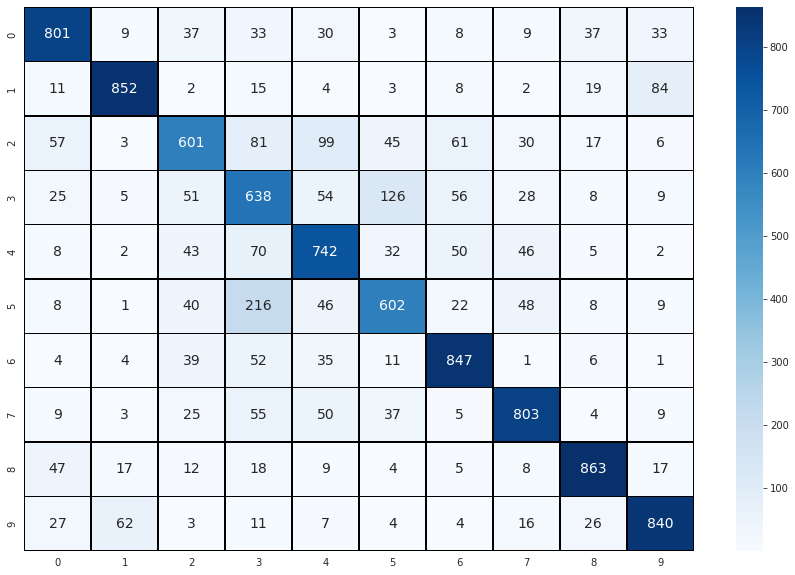

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [ ]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 24s 14ms/step - loss: 1.9659 - accuracy: 0.3044 - val_loss: 1.5935 - val_accuracy: 0.4202
Epoch 2/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4471 - accuracy: 0.4794 - val_loss: 1.3701 - val_accuracy: 0.5052
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2526 - accuracy: 0.5651 - val_loss: 1.2064 - val_accuracy: 0.5809
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1174 - accuracy: 0.6190 - val_loss: 1.0451 - val_accuracy: 0.6456
Epoch 5/50
1563/1563 [==============================] - 16s 11ms/step - loss: 1.0190 - accuracy: 0.6586 - val_loss: 0.8631 - val_accuracy: 0.6981
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9404 - accuracy: 0.6917 - val_loss: 1.2305 - val_accuracy: 0.6064
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8844 - accuracy: 0.7087 - val_loss: 0.7173 -

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
10,0.740,0.762,0.618,0.798
11,0.706,0.771,0.564,0.811
12,0.693,0.777,0.545,0.817
13,0.676,0.785,0.595,0.801
14,0.653,0.790,0.580,0.806


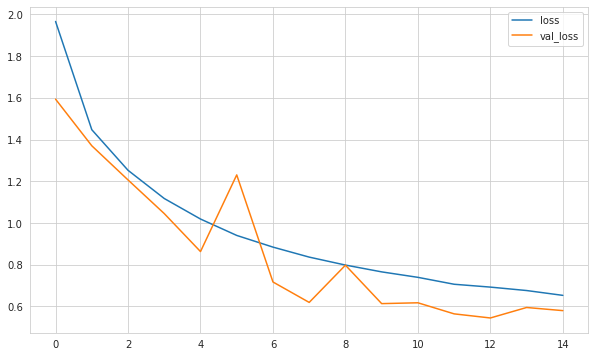

In [ ]:
summary[["loss", "val_loss"]].plot();

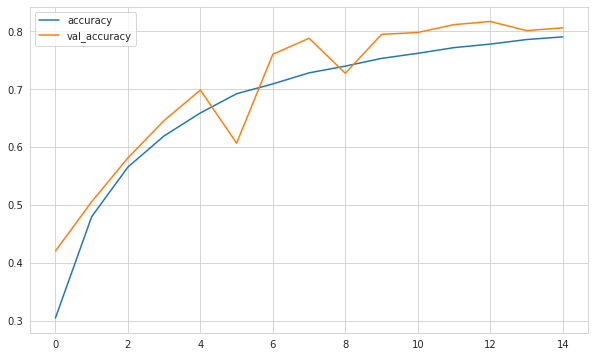

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.5448 - accuracy: 0.8166


[0.5447814464569092, 0.8166000247001648]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5447814464569092
Test accuracy: 0.8166000247001648


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1000
           1       0.89      0.94      0.91      1000
           2       0.84      0.67      0.74      1000
           3       0.65      0.64      0.64      1000
           4       0.78      0.84      0.81      1000
           5       0.65      0.78      0.71      1000
           6       0.84      0.87      0.86      1000
           7       0.89      0.83      0.86      1000
           8       0.92      0.90      0.91      1000
           9       0.90      0.88      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



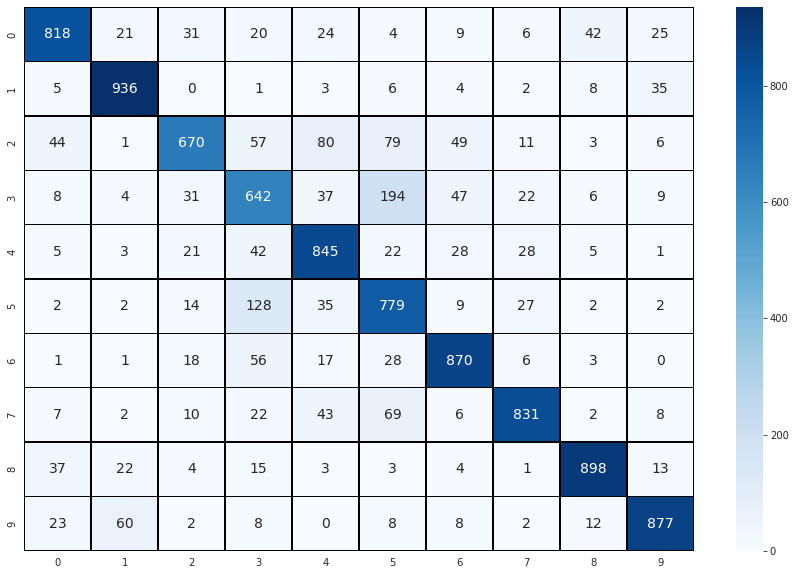

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [ ]:
my_image = X_test[44]

In [ ]:
my_image.shape

(32, 32, 3)

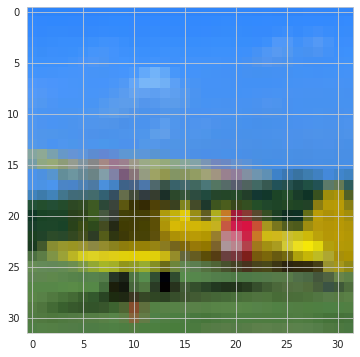

In [ ]:
plt.imshow(my_image)

In [ ]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [ ]:
image_prediction

array([[9.9831885e-01, 1.7256147e-04, 3.3399442e-04, 2.1774915e-05,
        9.5283765e-05, 1.3566708e-05, 6.9965886e-06, 7.7481120e-05,
        3.7997842e-04, 5.7963532e-04]], dtype=float32)

In [ ]:
np.argmax(image_prediction, axis=1)

array([0])

In [ ]:
result=np.argmax(image_prediction, axis=1)

In [ ]:
result

array([0])

In [ ]:
classes[int(result)]

'airplane'

In [ ]:
model.save("cnn-1.h5")

# finished

In [ ]:
model=tf.keras.models.load_model('cnn-1.h5')

In [ ]:
X_test[15].shape

(32, 32, 3)

In [ ]:
np.expand_dims(X_test[15],axis=0).shape

(1, 32, 32, 3)

In [ ]:
pred=model.predict(np.expand_dims(X_test[15],axis=0))

In [ ]:
np.argmax(pred)

8

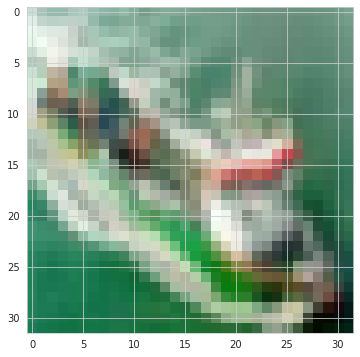

In [ ]:
plt.imshow(X_test[15])

In [ ]:
classes[8]

'ship'